In [1]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd

In [2]:
# load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("mediumLinkedin.gexf")

# Exploration of the graph : relational data understanding

In [3]:
# networkx short summary of information for the graph g
print(G)

Graph with 811 nodes and 1597 edges


In [4]:
G.number_of_nodes()

811

In [5]:
G.number_of_edges()

1597

## Degree


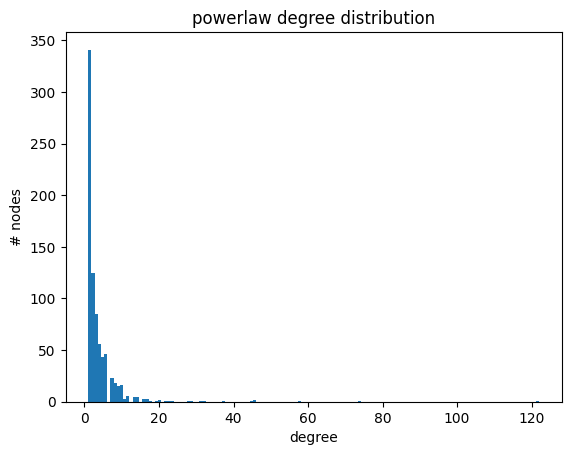

In [6]:
# Draw the degree distribution. If powerlow distribution, the graph shows one of the properties
# of a real (complex) network, such as social networks, biological networks, internet networks.
plt.figure(num=None)
fig = plt.figure(1)
degree_sequence=[d for n, d in G.degree()] # degree sequence
plt.hist(degree_sequence, bins='auto')  
plt.title("powerlaw degree distribution")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.show()
pylab.close()
del fig

In [7]:
#G.degree()

In [8]:
# To see the nodes with the highest degree
# We use "sorted" to sort a list
# We build the list of items (key + value) from NetworkX dictionary given by G.degree()
# The sort key is a lambda function which gives the indice of the data to sort.
# t is a tuple (key, value) from the dict
# Lambda says to sort with the value of the tuple: t[1], here the value form (key,value), i.e. d (the degree)
# to sort the tuple on the key, choose t[0]
sorted_nodes_by_degree=sorted([(n,d) for n, d in G.degree()], key=lambda t: t[1])
print("The 5 nodes with the highest degree are: %s" % str(sorted_nodes_by_degree[-5:]))
print("5 of the nodes with the smallest degree are: %s" % str(sorted_nodes_by_degree[:5]))

The 5 nodes with the highest degree are: [('U7972', 46), ('U8670', 46), ('U1045', 58), ('U7024', 74), ('U27287', 122)]
5 of the nodes with the smallest degree are: [('U8804', 1), ('U27759', 1), ('U7310', 1), ('U22859', 1), ('U1417', 1)]


## Neighbors

In [9]:
# To see the neighbors of a node
print("U7912 has %d neighbors" % len([n for n in G.neighbors('U7912')]))
print("U7912 has %d neighbors" % G.degree('U7912'))


U7912 has 17 neighbors
U7912 has 17 neighbors


In [10]:
for n in G.neighbors('U7912'):
    print(n)

U4456
U7909
U18928
U18965
U18942
U9126
U18939
U14577
U18949
U18932
U4488
U27941
U16219
U4485
U4661
U18914
U18943


In [11]:
# Clustering coefficient, or local density
# "Friends of my friends are also my friends"
# For unweighted graphs, the clustering of a node u is 
# the fraction of possible triangles through that node that exist
# If u has 3 neighbors, and 2 of them are neighbors (friends), there is 1 triangle, and
# there are 3 possible triangles. The clustering coefficcient for u i 1/3 
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering
nx.clustering(G, 'U7912')

0.19117647058823528

In [12]:
# What about our 5 highest degree nodes?
nx.clustering(G, [n for n, d in sorted_nodes_by_degree[-5:]])
# The more the degree, the less the number of trinangles

{'U7972': 0.02995169082125604,
 'U8670': 0.035748792270531404,
 'U1045': 0.011494252873563218,
 'U7024': 0.0011106997408367272,
 'U27287': 0.023438558460913157}

In [13]:
# What about all the nodes?
print("Mean clustering coefficient %f" % np.mean(list(nx.clustering(G).values())))
# 0.347288
# 34% of triangles

Mean clustering coefficient 0.347288


In [14]:
nx.average_clustering(G) # the same, the average is computed for you

0.34728772939134467

In [15]:
# Global density
# Let's consider now all pairs of nodes, even non-neighbors
# How far from a complete graph are we?
# Guess the formula?
nx.density(G)

0.004862157677611849

## Paths, distances

##### Most real networks have very short paths on average. This is known as the small-world property. The popular notion that social networks have six degrees of separation originated from Milgram’s experiment.
In practice, social graphs have diameter less than 20. A social network like Facebook has a diameter that shrinks ; Facebook does not publish this information, but research studies estimate it 6.6 degrees of separation The Anatomy of the Facebook Social Graph http://arxiv.org/abs/1111.4503 or 4.74 Four Degrees of Separation http://arxiv.org/abs/1111.4570...

In [16]:
# The diameter is the longest of the shortest path
nx.diameter(G)

19

Stop here a minute: what is the complexity of this operation in O(n), n number of nodes?

In [17]:
# Eccentricity is, for a node, the longest shortest path from/to this node 
# NB we precompute the length of shortest paths here, because it costs! and we will use it several times
precomputed_eccentricity=nx.eccentricity(G)
precomputed_eccentricity['U7912']

13

In [18]:
sorted_nodes_by_max_distance=sorted([(n,d) for n, d in precomputed_eccentricity.items()], key=lambda t: t[1])
print("The 5 nodes with the highest longest distance to others are: %s" % str(sorted_nodes_by_max_distance[-5:]))

The 5 nodes with the highest longest distance to others are: [('U8904', 19), ('U8909', 19), ('U11828', 19), ('U8900', 19), ('U11827', 19)]


In [19]:
# What about the closest nodes to others
sorted_nodes_by_max_distance[:5]

[('U2656', 10), ('U27287', 10), ('U24504', 10), ('U27476', 11), ('U4665', 11)]

The minimum of the longest shortest path is 10. It is the radius of the graph
The center of the graph is composed of 3 nodes, the nodes with eccentricity equal to the radius

## Conclusion: Our LinkedIn graph is like a protein network!

Real networks have the same properties : 
* the small-world property (low diameter), 
* high average clustering coefficient 
* and power-law distribution of degree.



# So, what about the influencers?

In [20]:
# We use pandas dataframes to load attributes
# Nodes are characterized by a list of colleges, a list of employers, a list of location
# The order means nothing. Nothing allow us to determine the current employer...
df = pd.read_csv('employer.csv', sep='\t', header='infer')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'employer.csv'

In [ ]:
df.groupby('name').count().describe()

* 730 users in this dataframe. Some nodes are not characterized by the attribute employer
* Median: 50% of users have more than 3 employers, 75% of them have 4 employer, and the max is 13!!!!

In [ ]:
df['employer'].value_counts()

In [ ]:
# Boolean row selection by values in a column
df.loc[df['employer'].isin(['google','google inc']),:].head()


In [ ]:
len(df.loc[df['employer'].isin(['google','google inc']),:].drop_duplicates())

In [ ]:
google=df.loc[df['employer'].isin(['google','google inc']),'name'].values
google

Yes!!! 35 (unique) users are working (or worked) for Google (or Google inc)! How can "use" them? Do I pick one of them randomly?

Maybe I should try to be introduced by friends? Or the friends of my friens? Let's use the Strength of Weak Ties!

## What about me? My name is U19886

In [ ]:
# I am node U19886
df[df.name == 'U19886']

Arghhh. No collegue to help me, but I still have friends !

In [ ]:
# How many neighbors?
G.degree('U19886')

In [ ]:
# Maybe, my neighbors know someone who work at Google and may recommend me to their boss?
i = 0
for nbr in G.neighbors('U19886'):
    for nbr_nbr in G.neighbors(nbr):
        i+=1
        if nbr_nbr in google:
            print("My friend %s has a neighbor who works at Google: %s" % (nbr,nbr_nbr))
print("We have search %d users" % i)

## Let's use the weaker ties! And the shortest path: the shorter the path, the more concerned the Google employee who may get me pulled in

In [ ]:
p=19
path = []
for n in google:
    pp=nx.shortest_path(G,'U19886', n)
    if len(pp) < p :
        path=pp
        p=len(pp)
path

Not so bad! Just 2 intermediaries to ask for a recommendation!

## Other strategies?

Maybe, we could use a longer path, but with people sharing attributes, they might be more concerned!

# Drawing

In [ ]:
pos = nx.spring_layout(G, iterations=200)

In [ ]:
nx.draw_networkx_nodes(G,pos)

In [ ]:
# 4 colors : me, google target, other google employees and others
color_map={}
color_map['U19886'] = 1.0
for n in google:
    if n=='U7151':
        color_map[n] = 0.6
    else:
        color_map[n] = 0.5
color_map[None]=0.0    

In [ ]:
# If else in list comprehensio
l = [22, 13, 45, 50, 98, 69, 43, 44, 1]
[x+1 if x >= 45 else x+5 for x in l]

In [ ]:
large_nodes = list(google).append('U19886')
large_nodes

In [ ]:
# generate the color values list in the correct order (iteration of nodes)
color_values = [color_map[node] if node in color_map else color_map[None] for node in G.nodes()]
size_values = [300 if (node=='U7151' or node=='U19886') else 10 for node in G.nodes()]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pylab
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
nx.draw_networkx_nodes(G,pos, node_size=size_values, cmap=plt.get_cmap('jet'), node_color=color_values)
nx.draw_networkx_edges(G,pos)
cut = 1.00
xmax = cut * max(xx for xx, yy in pos.values())
ymax = cut * max(yy for xx, yy in pos.values())
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.show()
pylab.close()
del fig
